In [1]:
# Importação de bibliotecas e módulos
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as random
%matplotlib inline

In [2]:
# Opções
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

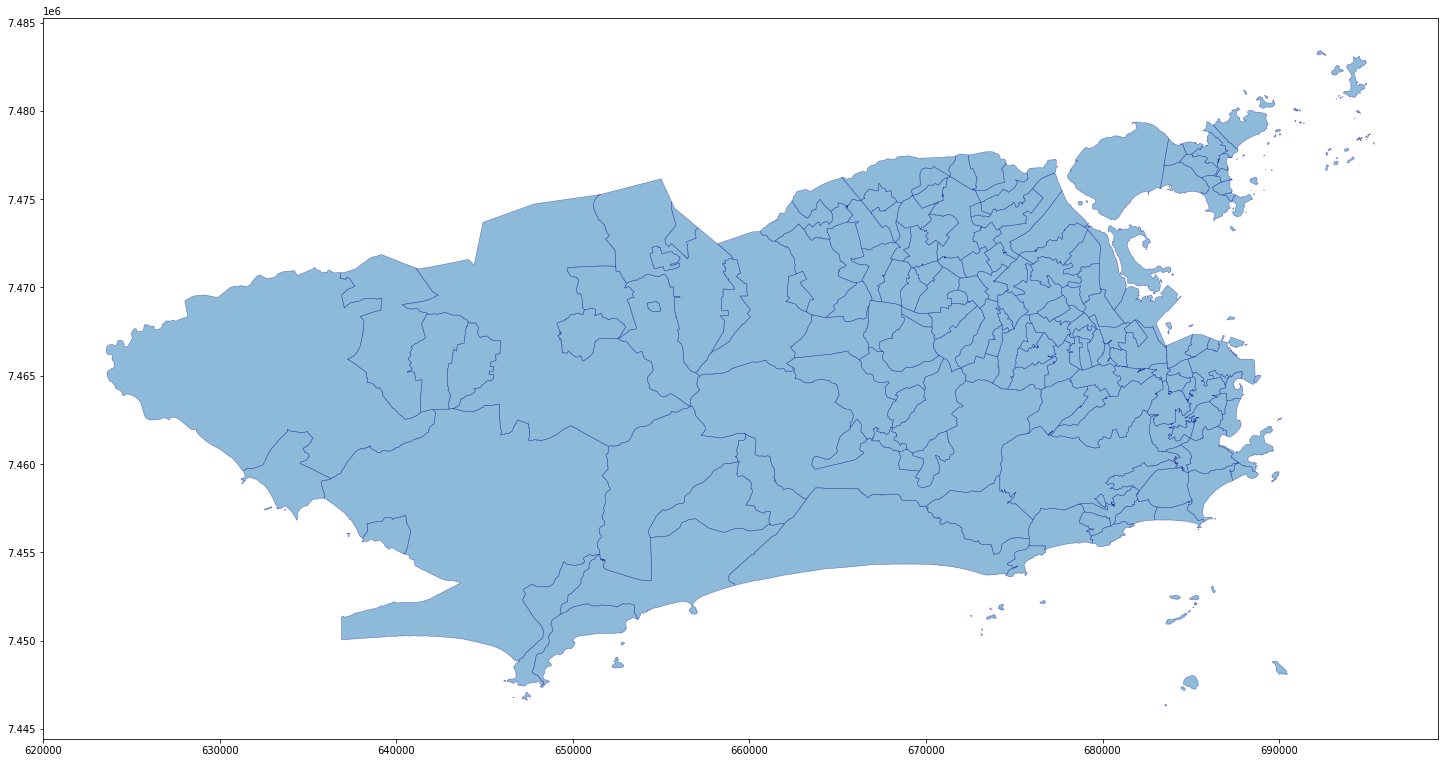

In [3]:
# Abrindo o shape
mapa = gpd.read_file('Limite_Bairro.shp')
mapa = mapa.astype({"CODBAIRRO": 'int64'}).astype({"Cod_RP": 'float'}).astype({"Cod_RP": 'int64'})
mapa = mapa[['CODBAIRRO','CODRA','Cod_RP','geometry']]
ax = mapa.plot(figsize=(25, 25), edgecolor='darkblue', linewidth=0.5, alpha=0.5)
plt.show()

In [4]:
random.seed(1) #Para manter a reprodutividade

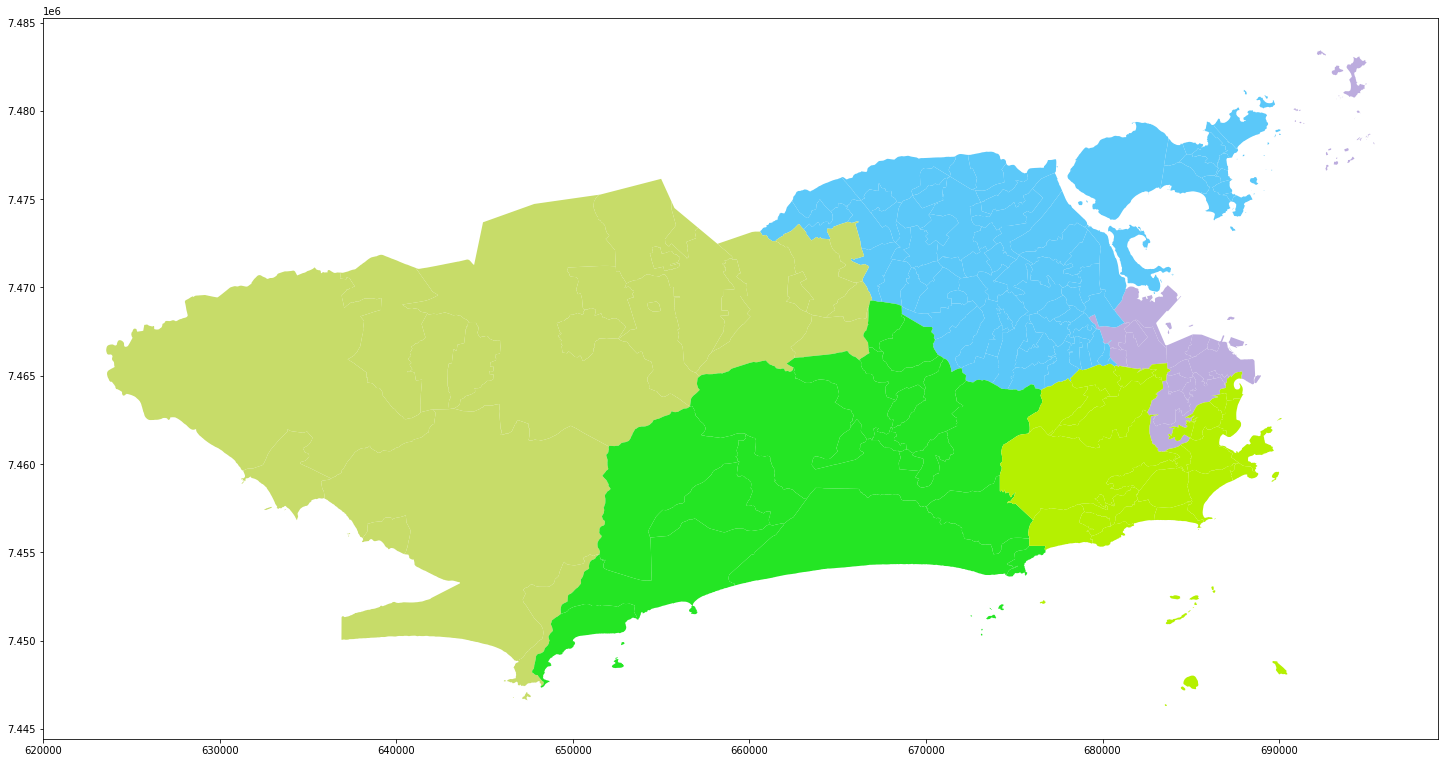

In [5]:
# Fazendo um mapa com cores aleatórias das Regiões de Planejamento
cods = mapa['Cod_RP'].value_counts().index.to_series().reset_index(drop=True).to_frame(name="Cod_RP")
cods['cores'] = ["#"+''.join([random.choice(list('0123456789ABCDEF')) for j in range(6)])
             for i in range(len(cods))]
mapa1 = mapa.merge(cods, left_on='Cod_RP', right_on='Cod_RP', how='outer')
mapa1 = gpd.GeoDataFrame(mapa1)
mapa1.plot(figsize=(25, 25), color=mapa1['cores'])
plt.show()

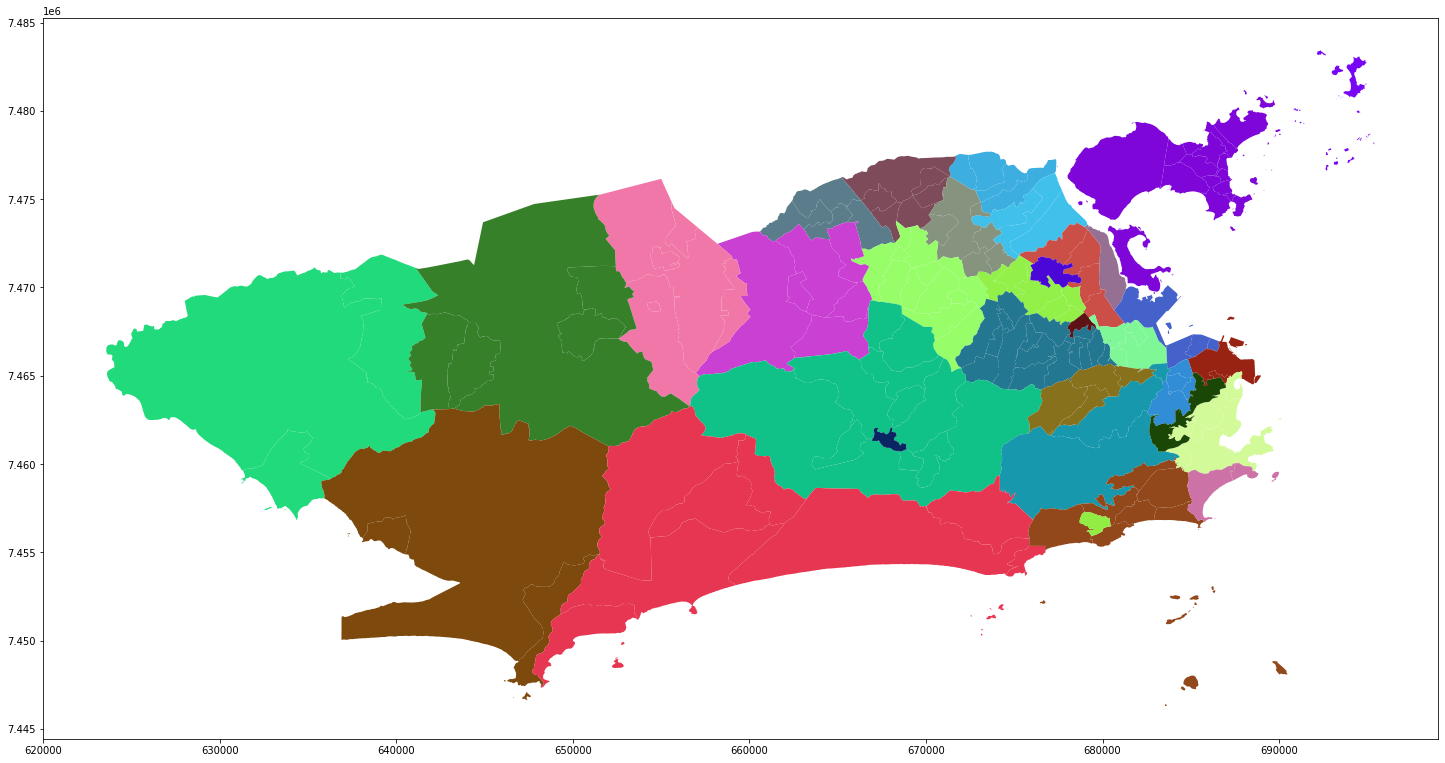

In [6]:
# Fazendo um mapa com cores aleatórias das Regiões Administrativas
cods = mapa['CODRA'].value_counts().index.to_series().reset_index(drop=True).to_frame(name="CODRA")
cods['cores'] = ["#"+''.join([random.choice(list('0123456789ABCDEF')) for j in range(6)])
             for i in range(len(cods))]
mapa2 = mapa.merge(cods, left_on='CODRA', right_on='CODRA', how='outer')
mapa2 = gpd.GeoDataFrame(mapa2)
mapa2.plot(figsize=(25, 25), color=mapa2['cores'])
plt.show()

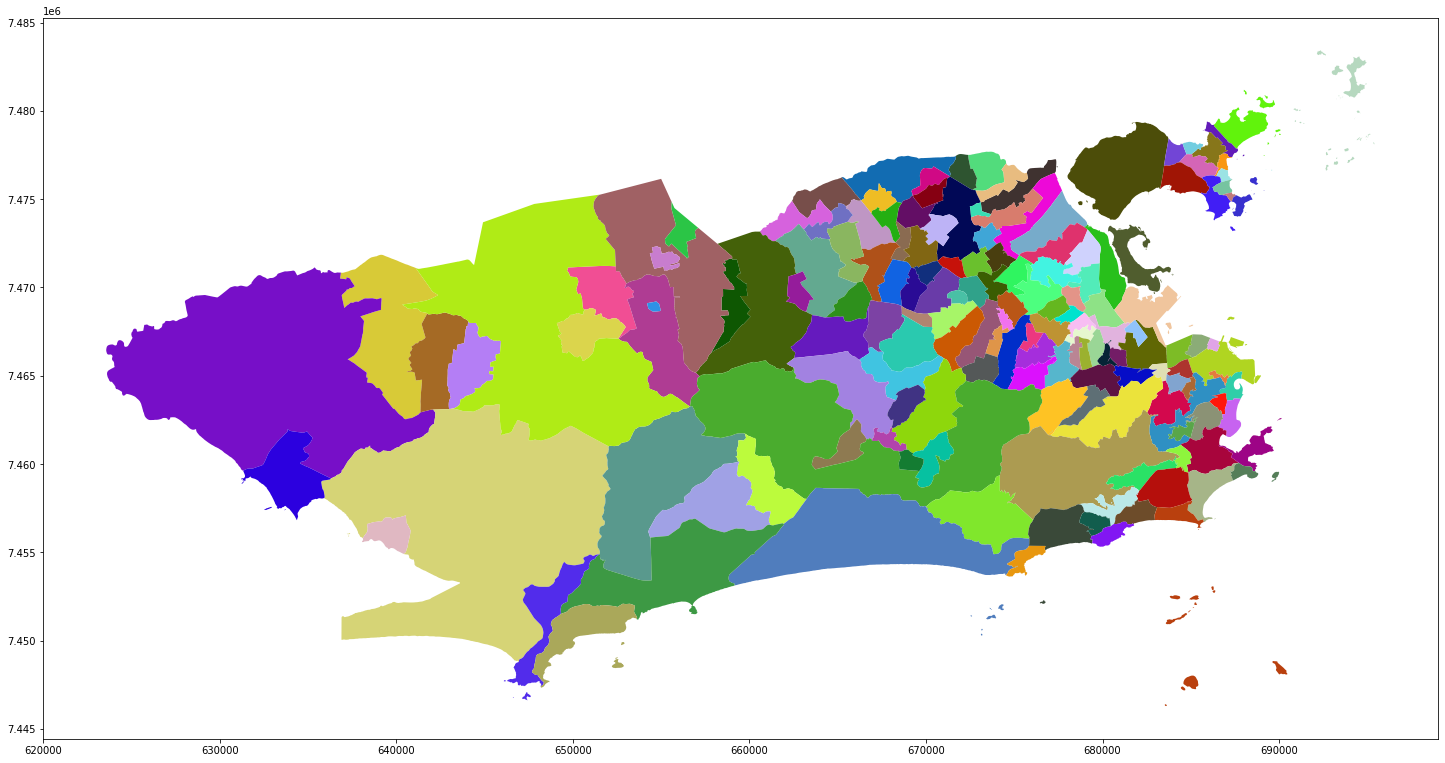

In [7]:
# Fazendo um mapa com cores aleatórias dos Bairros
cods = mapa['CODBAIRRO'].value_counts().index.to_series().reset_index(drop=True).to_frame(name='CODBAIRRO')
cods['cores'] = ["#"+''.join([random.choice(list('0123456789ABCDEF')) for j in range(6)])
             for i in range(len(cods))]
mapa3 = mapa.merge(cods, left_on='CODBAIRRO', right_on='CODBAIRRO', how='outer')
mapa3 = gpd.GeoDataFrame(mapa3)
mapa3.plot(figsize=(25, 25), color=mapa3['cores'])
plt.show()